# Table of Contents
### Final Project part 1, Decision tree (random forest) 
- [ 1 - Import Statememts ](#1)
- [ 2 -  Loading the Data](#2)
- [ 3 - seperate features and targets](#3)
- [ 4 - Feature Scaling](#4)
- [ 5 - Split the data](#5)
- [ 6 - Neural Network Model](#6)
- [ 7 - Compile and Train](#7)
- [ 8 - Summary Graphs and Functions](#8)
     - [ 8.1 Loss graph](#8.1)
     - [ 8.2 Accuracy Graph](#8.2)
     - [ 8.3 Calculate Prediction](#8.3)
     - [ 8.4 Calculate Accuracy](#8.4)
     - [ 8.5 Confusion Matrix Graph](#8.5)
- [ 9 - Report](#9)

Vincent Chu
vmc43b@umsystem.edu

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [86]:
#load the data
data = pd.read_csv('bank_loan_data.csv')

In [130]:
#seperate features and target
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

In [131]:
#feature scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
#split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [119]:
# Create the model
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Lambda(lambda x: x/10.0),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Print model summary
model.summary()

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=25,
    batch_size=32
)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_14 (Lambda)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.6714 - val_accuracy: 0.9060 - val_loss: 0.5594
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.5095 - val_accuracy: 0.9060 - val_loss: 0.3578
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9070 - loss: 0.3260 - val_accuracy: 0.9060 - val_loss: 0.2704
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.9010 - loss: 0.2633 - val_accuracy: 0.9060 - val_loss: 0.2281
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9090 - loss: 0.2134 - val_accuracy: 0.9080 - val_loss: 0.1947
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9223 - loss: 0.1762 - val_accuracy: 0.9240 - val_loss: 0.1701
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.9338 - loss: 0.1665 - val_accuracy: 0.9410 - val_loss: 0.1515
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9419 - loss: 0.1493 - val_accuracy: 0.9450 -

In [120]:
def plot_loss_history(history):
    """
    Plot training and validation loss over epochs.
    
    Parameters:
    history: Keras history object containing training history
    """
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'CV'], loc='upper left')
    plt.show()

In [121]:
def plot_accuracy_history(history):
    """
    Plot training and validation accuracy over epochs.
    
    Parameters:
    history: Keras history object containing training history
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'CV'], loc='upper left')
    plt.show()

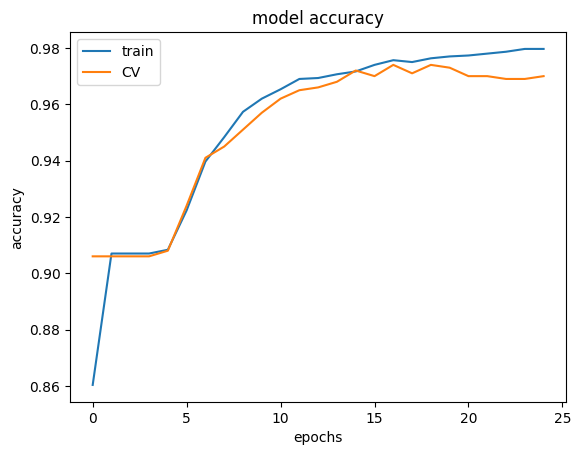

In [122]:
plot_accuracy_history(history)

In [123]:
def get_predictions(feature_data):
    # Run feature data through the model
    logits = model.predict(feature_data)
    
    # Convert to binary predictions (0 or 1)
    predictions = (logits > 0.5).astype(int)
    
    return predictions.flatten()

In [124]:
#calculate accuracy
def calculate_accuracy(labels, predictions):
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")


In [125]:
#confusion Matrix
def print_confusion_matrix(true_labels, predictions):
    # Create and plot confusion matrix
    mat = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(15, 15))
    plt.imshow(mat, cmap='Blues')
    
    # Calculate metrics
    precision = precision_score(true_labels, predictions, average=None)
    recall = recall_score(true_labels, predictions, average=None)
    f1 = f1_score(true_labels, predictions, average=None)
    
    print(f"\nPrecision: {np.mean(precision):.2f}".format(np.mean(precision)))
    print(f"Recall: {np.mean(recall):.2f}".format(np.mean(recall)))
    print(f"F1 score: {np.mean(f1):.2f}".format(np.mean(f1)))
    
    plt.show()
    return

In [126]:
prediction_train = get_predictions(X_train)
calculate_accuracy(y_train, prediction_train)

prediction_cv = get_predictions(X_cv)
calculate_accuracy(y_cv, prediction_cv)

prediction_test = get_predictions(X_test)
calculate_accuracy(y_test, prediction_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
Accuracy: 98.03%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Accuracy: 97.00%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 97.40%


# Summary Report of Neural Network and Results
## Steps and preparing the data
### Data Preparation
Loaded bank loan data from CSV file
Features included: ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard
Target variable: Personal Loan (binary classification: 0 or 1)


### Data Preprocessing
Used StandardScaler to normalize the numerical features
Split data into three sets:

Training set (60%)
Validation set (20%)
Test set (20%)

### Model Architecture
Created Sequential model with the following layers:

Input layer matching feature dimensions
Dense layer (512 neurons, ReLU activation)
Dense layer (256 neurons, ReLU activation)
Lambda layer (scaling factor 1/10)
Dense layer (128 neurons, ReLU activation)
Dense layer (64 neurons, ReLU activation)
Output layer (1 neuron, sigmoid activation)

### Model Compilation
Used binary crossentropy loss function
Adam optimizer with learning rate 0.0001
Tracked accuracy metric

### Model Training
Trained for 25 epochs
Batch size of 32
Used validation data to monitor performance

### Created Helper Functions
calculate_accuracy(): Computes prediction accuracy
get_predictions(): Generates binary predictions from model
print_confusion_matrix(): Creates confusion matrix visualization
plot_feature_distributions(): Visualizes feature distributions across data splits


### Evaluation
Generated predictions for all three datasets
Calculated accuracy metrics
Created confusion matrix
Visualized feature distributions to ensure proper data splitting


### Visualization
Created training history plots:

Loss over epochs
Accuracy over epochs

Generated feature distribution plots comparing train/validation/test sets
Displayed confusion matrix for model performance analysis

### Model Accuracy

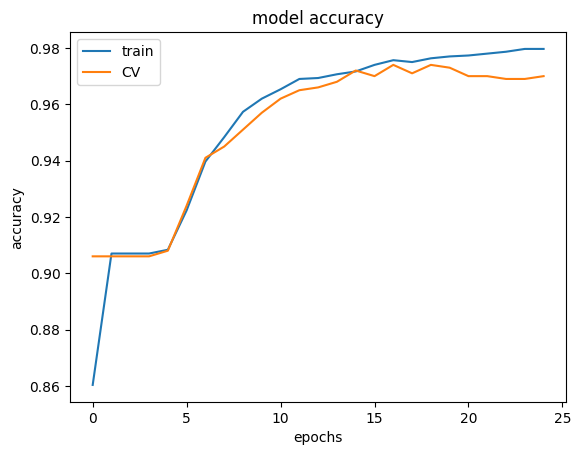

In [127]:
plot_accuracy_history(history)

### Model Loss

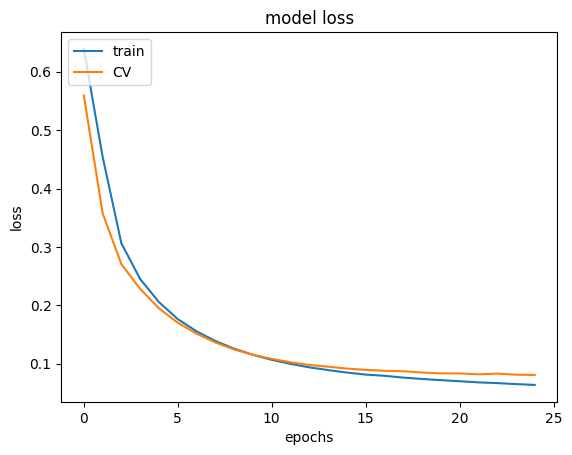

In [128]:
plot_loss_history(history)

### Precision, Recall and F1 Scores


Precision: 0.96
Recall: 0.92
F1 score: 0.94


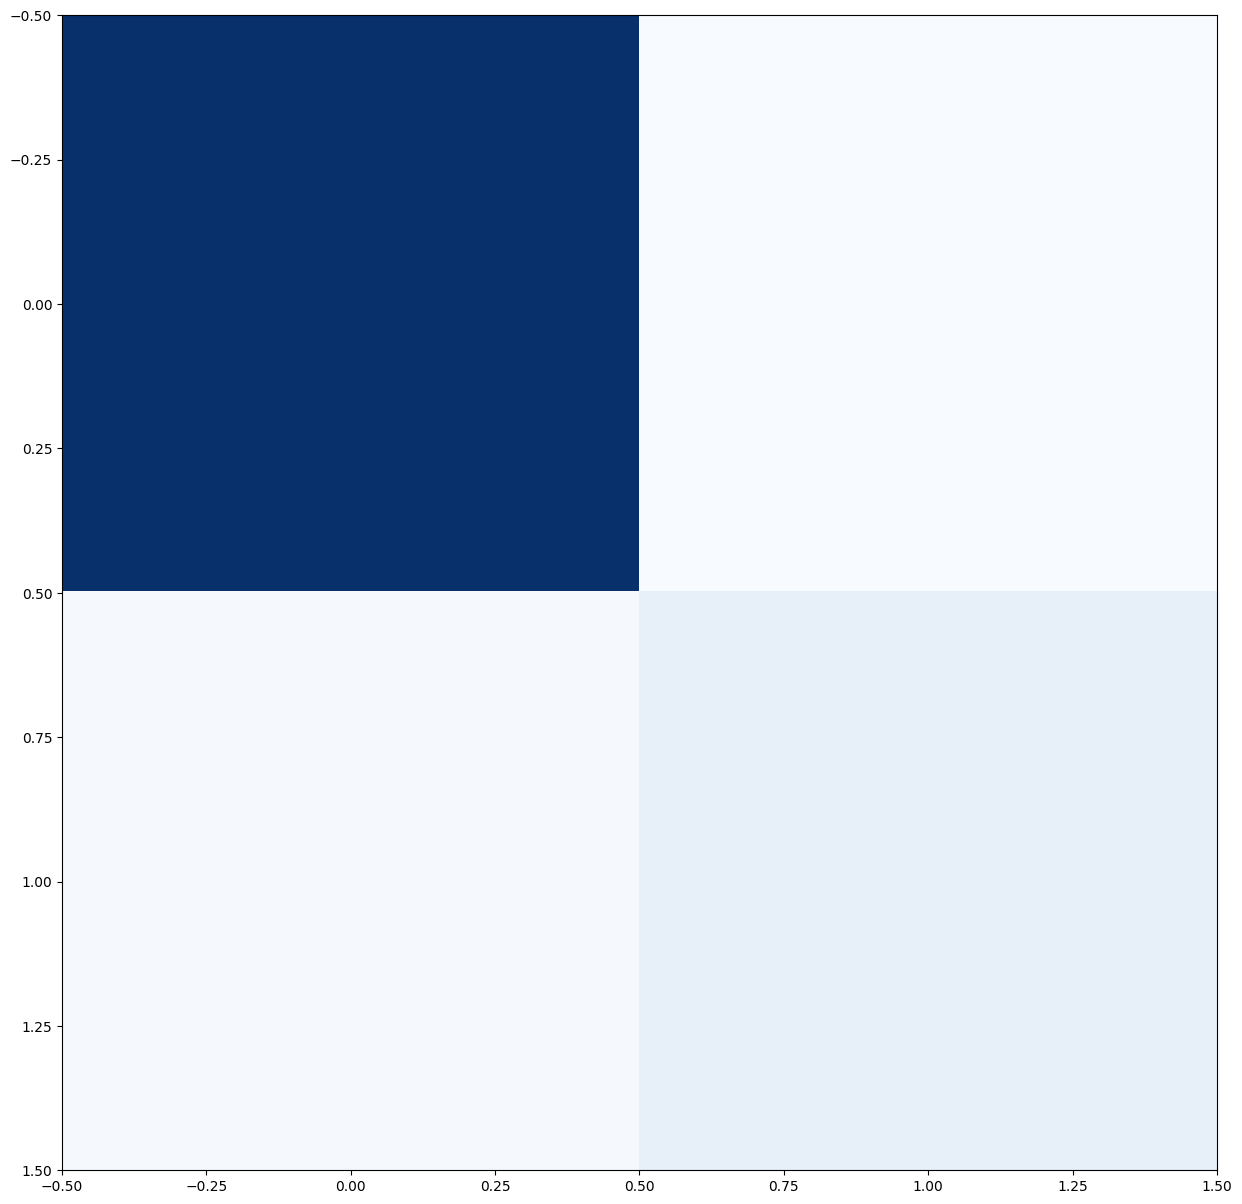

In [129]:
print_confusion_matrix(y_train, prediction_train)

# What could be improved and most challenging part
I think some of the features could have been dropped that didn't pertain much to a person getting a loan. 

The most challenging part was dimension errors when doing the predictions with the data. THe managing of the data splits was difficult to keep in order. 